In [263]:
"""Импортируем модули"""
import torch
import transformers 
import pandas as pd
import numpy as np
from tqdm import notebook 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop 
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences 
import scipy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, roc_curve, roc_auc_score, precision_score,recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_log_error
import matplotlib.pyplot as plt 

In [264]:
house_train = pd.read_csv('/Users/evgeniy.solovev/RTlabs/Kaggle/house_prices/train.csv')
house_test = pd.read_csv('/Users/evgeniy.solovev/RTlabs/Kaggle/house_prices/test.csv')

In [265]:
Numlist1 = ['BsmtQual','BsmtCond', 'FireplaceQu','GarageQual', 'GarageCond']
Numlist2 = ['BsmtExposure']
Numlist3 = ['BsmtFinType1' , 'BsmtFinType2']
Numlist4 = ['PoolQC']
Numlist5 = ['Fence']
Numlist6 = ['ExterQual','ExterCond','HeatingQC', 'KitchenQual']
Numlist7 = ['LotShape']
Numlist8 = ['LandSlope']
Numlist9 = ['Functional']
Numlist10 = ['GarageFinish']
def numeric_map1(x):
    return x.map({'Po' : 1 ,'Fa' : 2 , 'TA' : 3 , 'Gd' : 4 , 'Ex' : 5 , np.nan : 0})
def numeric_map2(y):
    return y.map({'No' : 1 ,'Mn' : 2 , 'Av' : 3 , 'Gd' : 4 , np.nan : 0})
def numeric_map3(z):
    return z.map({'Unf' : 1 ,'LwQ' : 2 , 'Rec' : 3 , 'BLQ' : 4 ,'ALQ': 5, 'GLQ': 6, np.nan : 0})
def numeric_map4(a):
    return a.map({'Fa' : 1 ,'TA' : 2 , 'Gd' : 3 , 'Ex' : 4 , np.nan : 0})
def numeric_map5(b):
    return b.map({'MnWw' : 1 ,'GdWo' : 2 , 'MnPrv' : 3 , 'GdPrv' : 4 , np.nan : 0})
def numeric_map6(c):
    return c.map({'Po' : 1 ,'Fa' : 2 , 'TA' : 3 , 'Gd' : 4 , 'Ex' : 5 })
def numeric_map7(d):
    return d.map({'IR3' : 1 ,'IR2' : 2 , 'IR1' : 3 , 'Reg' : 4 })
def numeric_map8(e):
    return e.map({'Sev' : 1 ,'Mod' : 2 , 'Gtl' : 3 })
def numeric_map9(f):
    return f.map({'Sal' : 1 ,'Sev' : 2 , 'Maj2' : 3 ,'Maj1' : 4, 'Mod' : 5, 'Min2' : 6 , 'Min1' : 7, 'Typ' : 8})
def numeric_map10(g):
    return g.map({'Unf' : 1 ,'RFn' : 2 , 'Fin' : 3 , np.nan : 0})
house_train[Numlist1] = house_train[Numlist1].apply(numeric_map1)
house_train[Numlist2] = house_train[Numlist2].apply(numeric_map2)
house_train[Numlist3] = house_train[Numlist3].apply(numeric_map3)
house_train[Numlist4] = house_train[Numlist4].apply(numeric_map4)
house_train[Numlist5] = house_train[Numlist5].apply(numeric_map5)
house_train[Numlist6] = house_train[Numlist6].apply(numeric_map6)
house_train[Numlist7] = house_train[Numlist7].apply(numeric_map7)
house_train[Numlist8] = house_train[Numlist8].apply(numeric_map8)
house_train[Numlist9] = house_train[Numlist9].apply(numeric_map9)
house_train[Numlist10] = house_train[Numlist10].apply(numeric_map10)

house_test[Numlist1] = house_test[Numlist1].apply(numeric_map1)
house_test[Numlist2] = house_test[Numlist2].apply(numeric_map2)
house_test[Numlist3] = house_test[Numlist3].apply(numeric_map3)
house_test[Numlist4] = house_test[Numlist4].apply(numeric_map4)
house_test[Numlist5] = house_test[Numlist5].apply(numeric_map5)
house_test[Numlist6] = house_test[Numlist6].apply(numeric_map6)
house_test[Numlist7] = house_test[Numlist7].apply(numeric_map7)
house_test[Numlist8] = house_test[Numlist8].apply(numeric_map8)
house_test[Numlist9] = house_test[Numlist9].apply(numeric_map9)
house_test[Numlist10] = house_test[Numlist10].apply(numeric_map10)

In [266]:
train_num = house_train.select_dtypes(exclude = ['object'])
train_cat = house_train.select_dtypes('object')
test_num = house_test.select_dtypes(exclude = ['object'])
test_cat = house_test.select_dtypes('object')

In [267]:
train_num.drop('MSSubClass', inplace = True, axis = 1)
test_num.drop('MSSubClass', inplace = True, axis = 1)
train_num.drop('YrSold', inplace = True, axis = 1)
test_num.drop('YrSold', inplace = True, axis = 1)
train_num.drop('Id', inplace = True, axis = 1)
test_num.drop('Id', inplace = True, axis = 1)

C:\Users\evgeniy.solovev\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [268]:
skewed_list = []
for i in train_num.columns:
    if abs(train_num[i].skew()) > 0.5:
        skewed_list.append(i)

In [269]:
skewed_list = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2', 'TotalBsmtSF', 'BsmtUnfSF',
 '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', ]

In [270]:
train_num.drop(columns = ['PoolArea','GarageCond','GarageFinish', 'Functional','GarageYrBlt', 'TotRmsAbvGrd','BsmtFinType2','1stFlrSF'], inplace = True, axis = 1)
test_num.drop(columns = ['PoolArea','GarageCond','GarageFinish', 'Functional','GarageYrBlt', 'TotRmsAbvGrd','BsmtFinType2','1stFlrSF'], inplace = True, axis = 1)

In [271]:
corr2 = train_num.corr()
corr2['SalePrice'].sort_values(ascending = False).abs().head(2)

SalePrice      1.000000
OverallQual    0.790982
Name: SalePrice, dtype: float64

In [272]:
fe_list = ['BsmtUnfSF','BsmtCond', 'BedroomAbvGr', 'PoolQC', 'ScreenPorch', 'MoSold', '3SsnPorch', 'ExterCond','BsmtFinSF2',
          'BsmtHalfBath','MiscVal ', 'LowQualFinSF', 'LandSlope', 'OverallCond ', 'EnclosedPorch',  'KitchenAbvGr','Fence' ]

In [274]:
train_num = train_num.fillna(train_num.median())
test_num = test_num.fillna(test_num.median())

train_num[skewed_list] = train_num[skewed_list].apply(lambda i: np.log1p(i))
test_num[skewed_list] = test_num[skewed_list].apply(lambda i: np.log1p(i))

In [275]:
y = train_num['SalePrice']
train_num = train_num.iloc[:,:-1]

In [111]:
def dependency(data,feature):
    
    table = pd.crosstab(data['SalePrice'],data[feature])
    stat, p, dof, excpected = chi2_contingency(table) 

    print(dof)
    significance_level = 0.05
    print("p value: " + str(p)) 

    if p <= significance_level: 
        print( f'{feature}: REJECT NULL HYPOTHESIS')
        return(feature)
    else: 
        print(f'{feature}: ACCEPT NULL HYPOTHESIS')

In [276]:
dependent = ['MSZoning','Street','LotConfig','Neighborhood','MasVnrType',
             'Foundation','CentralAir','SaleType','SaleCondition']

In [277]:
train_cat = pd.get_dummies(train_cat[dependent], drop_first = True)
test_cat = pd.get_dummies(test_cat[dependent], drop_first = True)

In [278]:
train_num_2 = train_num.copy() 
test_num_2 = test_num.copy()

In [279]:
train_num_2['BsmtUnfSF'] = train_num_2['BsmtUnfSF']**2
test_num_2['BsmtUnfSF'] = test_num_2['BsmtUnfSF']**2

train_num_2['BsmtCond'] = train_num_2['BsmtCond']**2
test_num_2['BsmtCond'] = test_num_2['BsmtCond']**2

train_num_2['BedroomAbvGr'] = train_num_2['BedroomAbvGr']**2
test_num_2['BedroomAbvGr'] = test_num_2['BedroomAbvGr']**2

train_num_2['PoolQC'] = train_num_2['PoolQC']**2
test_num_2['PoolQC'] = test_num_2['PoolQC']**2

train_num_2['ScreenPorch'] = train_num_2['ScreenPorch']**2
test_num_2['ScreenPorch'] = test_num_2['ScreenPorch']**2

train_num_2['MoSold'] = train_num_2['MoSold']**2
test_num_2['MoSold'] = test_num_2['MoSold']**2

train_num_2['3SsnPorch'] = train_num_2['3SsnPorch']**2
test_num_2['3SsnPorch'] = test_num_2['3SsnPorch']**2

train_num_2['ExterCond'] = train_num_2['ExterCond']**2
test_num_2['ExterCond'] = test_num_2['ExterCond']**2

train_num_2['BsmtFinSF2'] = train_num_2['BsmtFinSF2']**2
test_num_2['BsmtFinSF2'] = test_num_2['BsmtFinSF2']**2

train_num_2['BsmtHalfBath'] = train_num_2['BsmtHalfBath']**2
test_num_2['BsmtHalfBath'] = test_num_2['BsmtHalfBath']**2

train_num_2['MiscVal'] = train_num_2['MiscVal']**2
test_num_2['MiscVal'] = test_num_2['MiscVal']**2

train_num_2['LowQualFinSF'] = train_num_2['LowQualFinSF']**2
test_num_2['LowQualFinSF'] = test_num_2['LowQualFinSF']**2

In [280]:
frames = [train_num, train_cat]
frames2 = [test_num, test_cat]

train = pd.concat(frames, axis = 1)
test = pd.concat(frames2, axis = 1)

In [281]:
sc = StandardScaler()
X_train = sc.fit_transform(train)
X_test = sc.fit_transform(test)
Y_train = np.log1p(y)

In [282]:
epochs = 1000
num_cols = len(train.columns) 

model.add(BatchNormalization(input_shape=(num_cols,)))
model.add(Dense(64, activation='relu'))  
model.add(Dense(28, activation='relu')) 
model.add(Dense(10, activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(1,))                               

model.compile(Adam(learning_rate=1e-3), 'mean_squared_error') 

history = model.fit(X_train, Y_train, epochs = epochs, validation_split = 0.2,verbose = 0 )
history_dict=history.history

The MSE score on the Train set is:	0.019


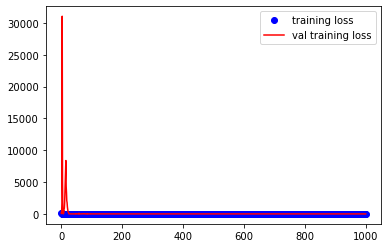

In [283]:
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("The MSE score on the Train set is:\t{:0.3f}".format(np.sqrt(mean_squared_log_error(Y_train,y_train_pred))))
Compare_df = pd.DataFrame({'TrueValue': np.expm1(Y_train), 'PredValue': np.expm1(y_train_pred_df.SalePrice)})

In [285]:
y_test_pred_df = pd.DataFrame(y_test_pred, columns=['SalePrice']) 
my_submission = pd.DataFrame({'Id': test_id, 'SalePrice': np.expm1(y_test_pred_df.SalePrice)})
my_submission.to_csv('/Users/evgeniy.solovev/Desktop/submission_NeuralNets.csv', index=False)

In [286]:
test_id

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [288]:
test

,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.394449,9.360741,4,3,5,6,7.581720,7.581720,0.000000,3,...,0,0,0,0,1,0,0,0,1,0
1,4.406719,9.565775,3,3,6,6,7.580189,7.580189,4.691348,3,...,0,0,0,0,1,0,0,0,1,0
2,4.317488,9.534668,3,3,5,5,7.599902,7.600402,0.000000,3,...,0,0,0,0,1,0,0,0,1,0
3,4.369448,9.208238,3,3,6,6,7.600402,7.600402,3.044522,3,...,0,0,0,0,1,0,0,0,1,0
4,3.784190,8.518392,3,3,8,5,7.597396,7.597396,0.000000,4,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,3.091042,7.568896,4,3,4,7,7.586296,7.586296,0.000000,3,...,0,0,0,0,1,0,0,0,1,0
1455,3.091042,7.546974,4,3,4,5,7.586296,7.586296,0.000000,3,...,0,0,0,0,1,0,0,0,0,0
1456,5.081404,9.903538,4,3,5,7,7.581210,7.599401,0.000000,3,...,0,0,0,0,1,0,0,0,0,0
1457,4.143135,9.253591,4,3,5,5,7.597396,7.597396,0.000000,3,...,0,0,0,0,1,0,0,0,1,0


In [289]:
house_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,4,Lvl,AllPub,...,120,0,0,3,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,3,Lvl,AllPub,...,0,0,0,0,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,3,Lvl,AllPub,...,0,0,0,3,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,3,Lvl,AllPub,...,0,0,0,0,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,3,HLS,AllPub,...,144,0,0,0,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,4,Lvl,AllPub,...,0,0,0,0,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,4,Lvl,AllPub,...,0,0,0,0,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,4,Lvl,AllPub,...,0,0,0,0,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,4,Lvl,AllPub,...,0,0,0,3,Shed,700,7,2006,WD,Normal
